In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from model_utils.learning_curve import plot_learning_curve
from preprocessing.interface import encode_df_text
from preprocessing.embedding import one_hot

In [3]:
X = pd.read_csv('prepared/lemmatized.csv')
y = pd.read_csv('prepared/target.csv')

X, y = encode_df_text(X, y, 3, 3,  one_hot)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [5]:
model = LogisticRegression(penalty = 'l2', C = 1, max_iter = 10)

In [6]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda\envs\kaggle-disaster-tweets\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=10)

In [7]:
print(classification_report((model.predict_proba(X_train)[:, 1] > .5).astype(float), y_train))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      2433
         1.0       0.87      0.92      0.89      1777

    accuracy                           0.91      4210
   macro avg       0.90      0.91      0.91      4210
weighted avg       0.91      0.91      0.91      4210



In [8]:
print(classification_report((model.predict_proba(X_test)[:, 1] > .5).astype(float), y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      1684
         1.0       0.71      0.79      0.75      1123

    accuracy                           0.79      2807
   macro avg       0.78      0.79      0.78      2807
weighted avg       0.79      0.79      0.79      2807



In [ ]:
p = plot_learning_curve(LogisticRegression(penalty = 'l2', C = 1, max_iter = 10), X, y)

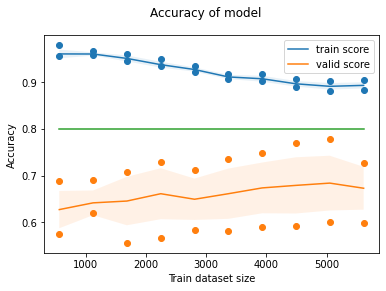

In [10]:
p